## Clase

In [1]:
numero = 123456

In [2]:
int(str(numero)[3])

4

In [3]:
import pandas as pd
df = pd.DataFrame([{'numero':123456}, {'numero':6789}])

In [4]:
df['numero'].nunique()

2

In [5]:
df['numero'].unique()

array([123456,   6789])

In [6]:
df['numero'].value_counts()

123456    1
6789      1
Name: numero, dtype: int64

In [7]:
df['primer_numero'] = df.apply(lambda x: int(str(x['numero'])[0]), axis=1)
df

,numero,primer_numero
0,123456,1
1,6789,6


In [8]:
import numpy as np
datos1 = np.array([10,0,10,0,0])
datos2 = np.array([4,4,4,4,4])
datos3 = np.array([10,0,10,0,0] * 1000)
datos4 = np.array([1000,0,1000,0,1000])

In [9]:
print(f'{np.mean(datos1)=}')
print(f'{np.mean(datos2)=}')
print(f'{np.mean(datos3)=}')
print(f'{np.mean(datos4)=}')

np.mean(datos1)=4.0
np.mean(datos2)=4.0
np.mean(datos3)=4.0
np.mean(datos4)=600.0


In [10]:
print(f'{np.std(datos1)=}')
print(f'{np.std(datos2)=}')
print(f'{np.std(datos3)=}')
print(f'{np.std(datos4)=}')

np.std(datos1)=4.898979485566356
np.std(datos2)=0.0
np.std(datos3)=4.898979485566356
np.std(datos4)=489.89794855663564


In [12]:
print(f'{np.std(datos1)/np.mean(datos1)=}')
print(f'{np.std(datos2)/np.mean(datos2)=}')
print(f'{np.std(datos3)/np.mean(datos3)=}')
print(f'{np.std(datos4)/np.mean(datos4)=}')

np.std(datos1)/np.mean(datos1)=1.224744871391589
np.std(datos2)/np.mean(datos2)=0.0
np.std(datos3)/np.mean(datos3)=1.224744871391589
np.std(datos4)/np.mean(datos4)=0.816496580927726


In [13]:
mediciones = np.array([10.0, 10.2, 10.1, 9.9, 10.1, 10.0])
mediciones

array([10. , 10.2, 10.1,  9.9, 10.1, 10. ])

In [14]:
medicion_promedio = np.mean(mediciones)
medicion_promedio

10.049999999999999

In [15]:
incertidumbre = np.std(mediciones)
incertidumbre

0.09574271077563347

In [16]:
intervalo_confianza = [medicion_promedio - incertidumbre, medicion_promedio + incertidumbre]
intervalo_confianza

[9.954257289224365, 10.145742710775632]

# El poder de las simulaciones

Varios de los problemas que se presentan en PyE pueden resolverse analíticamente, pero muchos más pueden resolverse computacionalmente. Vamos a ver qué podemos hacer con un ejemplo.

**Nota:** si todavía no viste [este video](https://www.youtube.com/watch?v=e1KqyG_1BsI&t=197s) sobre la ley de Benford, hazlo ahora. También será útil que consultes su [página de Wikipedia](https://es.wikipedia.org/wiki/Ley_de_Benford).

La Ley de Benford es una observación sobre la distribución de frecuencia de los dígitos iniciales en muchos conjuntos de datos numéricos de la vida real. La formulación matemática de la Ley de Benford tiene la forma

$P(d) = \log_{10} (1 + 1/d)$

donde *d* refiere al primer dígito del dato.


## 1. Explorando la Ley de Benford

**Ejercicios**

1. Grafica la distribución de la Ley de Benford.
1. ¿Los valores de la distribución suman 1?
1. Genera muestras de distinto tamaño de esta ley. Puedes usar la función `np.random.choice`.
1. **Desafío:** intenta generar un rango de valores esperados para cada dígito utilizando la Ley de Benford. Durante el encuentro te mostraremos cómo se hace.

## 2. ¿Cumplen la Ley de Benford?

Toma el conjunto de datos que trajiste y analiza visualmente si cumple la Ley de Benford. Piensa cómo sería un análisis cuantitativo (ten en cuenta los intervalos de confianza que viste durante el encuentro).

In [2]:
#Ejercicio 1
import numpy as np
import matplotlib.pyplot as plt
#creo función ley de benford
def benford(d):
    P=np.log10(1+1/d)
    return P

benford=np.vectorize(benford) 

In [18]:
dd

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
dist

array([0.30103   , 0.17609126, 0.12493874, 0.09691001, 0.07918125,
       0.06694679, 0.05799195, 0.05115252, 0.04575749])

Text(0, 0.5, 'P')

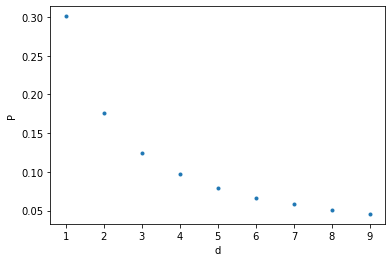

In [3]:
#1.1
dd=np.arange(1,10)
dist=benford(dd)
plt.plot(dd,dist,'.')
plt.xlabel('d')
plt.ylabel('P')


In [21]:
dist

array([0.30103   , 0.17609126, 0.12493874, 0.09691001, 0.07918125,
       0.06694679, 0.05799195, 0.05115252, 0.04575749])

In [20]:
#1.2
print(sum(dist))

1.0


In [31]:
dd

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
#1.3
#con random choice podemos asignar probabilidades a una tira de números a mano. Generamos una función que genera muestras de tamaño N con esa distribución de probabilidad

def muestra_ben(N):
    muestra=np.zeros(N)
    for i in range(N):
        muestra[i]=np.random.choice(dd,p=dist)
    return(muestra)

(array([1., 1., 1., 2., 0., 2., 1., 0., 1., 1.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

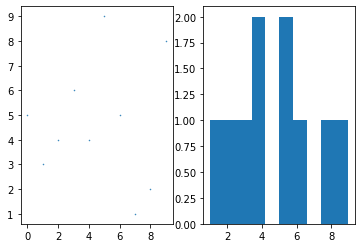

In [42]:
#genero muestra de N=1000
m1000=muestra_ben(10)

#grafico muestra e histograma
plt.figure()
plt.subplot(121)
plt.plot(m1000,'.',markersize=1)
plt.subplot(122)
plt.hist(m1000)

In [7]:
#1.4
#una opcion es ver que valores caen entre los percentiles 5, 95. Lo que esté entre esos valores serán los datos más esperables. 
p5=np.percentile(m1000, 5)
p95=np.percentile(m1000, 95)
rango=[p5,p95]
print(rango)

[1.0, 8.0]


In [43]:
m1000

array([5., 3., 4., 6., 4., 9., 5., 1., 2., 8.])

In [44]:
np.percentile(m1000, 10)

1.9

In [9]:
#Ejercicio 2
# poblacion municipios amba en 2010, fuente: http://www.estadistica.ec.gba.gov.ar/dpe/index.php/poblacion/dinamica/115-metodologia-dinamica/134-cuadros-estadisticos-dinamica
poblacion=[17072,
12047,
10654,
552902,
29044,
342677,
20337,
65280,
301572,
43823,
32761,
20239,
324244,
88470,
34190,
41336,
26367,
94461,
51892,
14494,
22237,
11570,
14692,
8205,
48703,
42277,
64185,
24890,
62152,
15825,
22933,
38320,
16889,
27042,
56729,
213619,
300959,
29805,
163722,
426005,
8869,
39594,
11130,
14903,
17365,
2816,
19747,
10783,
14889,
3700,
11202,
11261,
618989,
87185,
414196,
18078,
30864,
11826,
9585,
181241,
167824,
265981,
90305,
69633,
1775816,
654324,
459263,
10210,
23871,
16799,
41808,
17523,
36172,
616279,
106273,
19301,
10188,
322375,
21279,
54181,
63284,
528494,
21034,
6499,
452505,
321109,
17054,
92933,
47722,
111708,
30207,
39776,
5887,
104590,
3640,
299077,
25728,
81141,
15743,
9888,
582943,
33042,
15176,
17143,
23432,
12513,
20749,
32103,
8644,
32653,
23027,
23138,
8399,
163240,
292878,
276190,
145857,
59036,
59478,
10081,
123871,
9178,
376381,
1764,
12723,
43021,
57110,
340071,
8700,
35842,
269420,
31730,
31014,
114269,
15625084]


In [45]:
len(poblacion)

135

In [10]:
#genero una tira de vectores que sea el primer digito de cada dato de poblacion
primer_digito=np.zeros(len(poblacion))
for i in range(len(poblacion)):
    numero=poblacion[i]
    primer_digito[i]=int(str(numero)[:1])
print(primer_digito)

[1. 1. 1. 5. 2. 3. 2. 6. 3. 4. 3. 2. 3. 8. 3. 4. 2. 9. 5. 1. 2. 1. 1. 8.
 4. 4. 6. 2. 6. 1. 2. 3. 1. 2. 5. 2. 3. 2. 1. 4. 8. 3. 1. 1. 1. 2. 1. 1.
 1. 3. 1. 1. 6. 8. 4. 1. 3. 1. 9. 1. 1. 2. 9. 6. 1. 6. 4. 1. 2. 1. 4. 1.
 3. 6. 1. 1. 1. 3. 2. 5. 6. 5. 2. 6. 4. 3. 1. 9. 4. 1. 3. 3. 5. 1. 3. 2.
 2. 8. 1. 9. 5. 3. 1. 1. 2. 1. 2. 3. 8. 3. 2. 2. 8. 1. 2. 2. 1. 5. 5. 1.
 1. 9. 3. 1. 1. 4. 5. 3. 8. 3. 2. 3. 3. 1. 1.]


(array([43., 24., 24., 11., 10.,  9.,  0.,  8.,  6.]),
 array([1.        , 1.88888889, 2.77777778, 3.66666667, 4.55555556,
        5.44444444, 6.33333333, 7.22222222, 8.11111111, 9.        ]),
 <BarContainer object of 9 artists>)

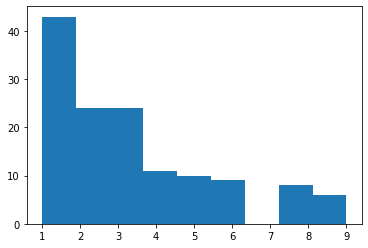

In [50]:
#grafico el histograma
plt.hist(primer_digito, bins=9)

In [51]:
unique, counts = np.unique(primer_digito, return_counts=True)

In [52]:
unique

array([1., 2., 3., 4., 5., 6., 8., 9.])

In [53]:
counts

array([43, 24, 24, 11, 10,  9,  8,  6])

In [16]:
counts/counts.sum()

array([0.31851852, 0.17777778, 0.17777778, 0.08148148, 0.07407407,
       0.06666667, 0.05925926, 0.04444444])

<img src="benford_probability.png" width="480">